# Import libs

In [1]:
import sys, os
if not sys.path[0] == os.path.abspath('..'):
    sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from bayes_classifier.bayes_classifier import bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Vertebral Column 3C dataset

In [2]:
Xy = pd.read_csv('./datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
b_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
b_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
b_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.8225806451612904, 0.8870967741935484, 0.8548387096774194, 0.8225806451612904, 0.8548387096774194, 0.8548387096774194, 0.7258064516129032, 0.7419354838709677, 0.8548387096774194, 0.8387096774193549, 0.8870967741935484, 0.8064516129032258, 0.8387096774193549, 0.7741935483870968, 0.7096774193548387, 0.8870967741935484, 0.7741935483870968, 0.8225806451612904, 0.8870967741935484, 0.9193548387096774]

Accuracy:
0.8282258064516126

Standard Deviation:
0.05639974575776084

Confusion Matrix:
    SL  NO  DH
SL  30   2   1
NO   2  16   2
DH   0   4   5
    NO  SL  DH
NO  14   1   2
SL   0  33   0
DH   4   0   8
    NO  SL  DH
NO  12   2   5
SL   0  31   1
DH   1   0  10
    DH  NO  SL
DH   3   3   0
NO   4  18   1
SL   2   1  30
    NO  DH  SL
NO  14   3   1
DH   5   8   0
SL   0   0  31
    NO  SL  DH
NO  21   0   4
SL   2  25   2
DH   1   0   7
    SL  NO  DH
SL  20   1   0
NO   3  17   6
DH   0   7   8
    DH  SL  NO
DH   7   0   5
SL 

# Confusion Matrix Mean

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,SL,NO,DH
SL,28,0,0
NO,1,15,3
DH,0,4,6


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.7258064516129032, 0.8709677419354839, 0.6774193548387096, 0.6935483870967742, 0.7903225806451613, 0.7580645161290323, 0.8064516129032258, 0.6612903225806451, 0.7903225806451613, 0.7580645161290323, 0.8225806451612904, 0.7580645161290323, 0.7419354838709677, 0.6612903225806451, 0.7903225806451613, 0.8548387096774194, 0.7258064516129032, 0.8225806451612904, 0.7903225806451613, 0.8225806451612904]

Accuracy:
0.7661290322580646

Standard Deviation:
0.059808052315287616

Confusion Matrix:
    SL  NO  DH
SL  28   3   2
NO   3  10   7
DH   0   2   7
    NO  SL  DH
NO  15   1   1
SL   2  29   2
DH   2   0  10
    NO  SL  DH
NO   8   2   9
SL   4  25   3
DH   2   0   9
    DH  NO  SL
DH   5   1   0
NO   7  14   2
SL   5   4  24
    NO  DH  SL
NO  13   3   2
DH   2  11   0
SL   3   3  25
    NO  SL  DH
NO  16   0   9
SL   5  23   1
DH   0   0   8
    SL  NO  DH
SL  19   1   1
NO   0  20   6
DH   0   4  11
    DH  SL  NO
DH  10   0   2
SL

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,SL,NO,DH
SL,24,3,2
NO,1,13,5
DH,0,2,9


# Showing bayes informations computed

In [8]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[0.8225806451612904, 0.8709677419354839, 0.8387096774193549, 0.8387096774193549, 0.8870967741935484, 0.8709677419354839, 0.8709677419354839, 0.8225806451612904, 0.8387096774193549, 0.8709677419354839, 0.8870967741935484, 0.8387096774193549, 0.8387096774193549, 0.8064516129032258, 0.8064516129032258, 0.8870967741935484, 0.8709677419354839, 0.8387096774193549, 0.8870967741935484, 0.8709677419354839]

Accuracy:
0.8532258064516128

Standard Deviation:
0.026453579785252777

Confusion Matrix:
    SL  NO  DH
SL  33   0   0
NO   3  12   5
DH   2   1   6
    NO  SL  DH
NO  13   2   2
SL   0  33   0
DH   3   1   8
    NO  SL  DH
NO  12   2   5
SL   0  32   0
DH   2   1   8
    DH  NO  SL
DH   3   2   1
NO   3  17   3
SL   1   0  32
    NO  DH  SL
NO  14   1   3
DH   3  10   0
SL   0   0  31
    NO  SL  DH
NO  20   0   5
SL   2  26   1
DH   0   0   8
    SL  NO  DH
SL  21   0   0
NO   0  20   6
DH   0   2  13
    DH  SL  NO
DH   8   1   3


In [9]:
confusion_matrix_mean(b_confusion_matrix_list)

,SL,NO,DH
SL,29,0,0
NO,1,15,3
DH,0,2,8


# Choosing two columns from the last X_train and X_test to plot decision surface

In [10]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
         0      1
52   50.21  29.76
57   46.86  15.35
42   53.85  19.23
84   76.33  42.40
91   70.95  20.16
..     ...    ...
271  42.52  16.54
230  65.61  23.14
143  60.63  20.60
79   47.74  12.09
100  84.59  30.36

[248 rows x 2 columns]
Test dataset:
         0      1
48   40.56  17.98
123  65.67  10.54
300  50.68   6.46
223  69.40  18.90
282  53.68  13.45
..     ...    ...
188  85.68  38.65
296  39.66  16.21
244  63.03  27.34
77   58.78   7.67
129  77.24  16.74

[62 rows x 2 columns]


# Training the models with the new dataset 2d

In [11]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

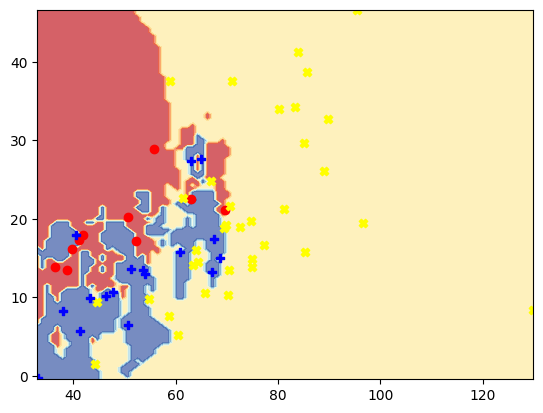

In [12]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

dh = np.where(knn_y_pred == 'DH')
sl = np.where(knn_y_pred == 'SL')
no = np.where(knn_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting dmc decision surface

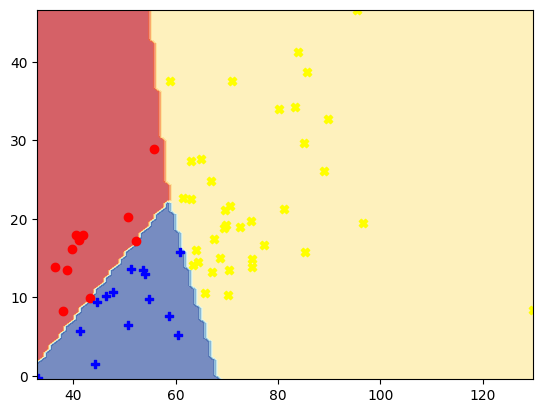

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

dh = np.where(dmc_y_pred == 'DH')
sl = np.where(dmc_y_pred == 'SL')
no = np.where(dmc_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting bayes decision surface

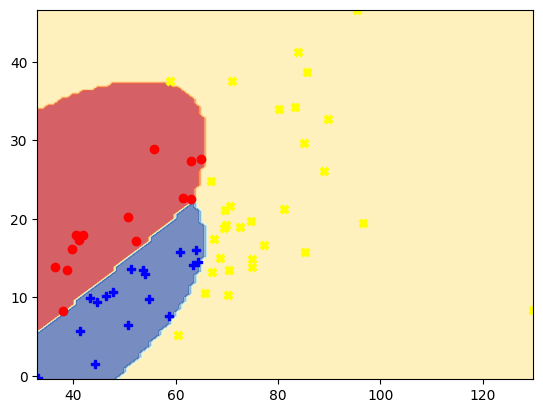

In [14]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

dh = np.where(b_y_pred == 'DH')
sl = np.where(b_y_pred == 'SL')
no = np.where(b_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()